# Decision Trees and Random Forests with Divvy Bikeshare Data

> This notebook takes another look at the Chicago Bikeshare Data, specifically in the context of Decision Tree and Random Forest modeling.  Below, a variety of instances are run for each model in an attempt to compare and classify their accuracy and computational efficiency.

> These initial cells import the modules necessary to read the data and generate the models.  Since this particular dataset is relatively large, I have made some subgroups of the data (by year) and have selected the columns which should be easiest to run, yet most relevant to the discussion below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import ensemble
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
import scipy
import seaborn as sns
import pydotplus.graphviz
from datetime import datetime

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

%matplotlib inline

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
# Setting the colors:

palette_1 = sns.diverging_palette(220, 7, s = 60, l = 50, n=8)
sns.set(palette = 'YlGnBu')

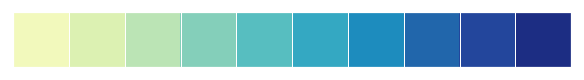

In [3]:
sns.palplot(sns.color_palette('YlGnBu', 10))

In [4]:
column_list = ['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender', 'starttime',
                'stoptime', 'tripduration', 'temperature', 'events', 'from_station_id',
                'dpcapacity_start', 'to_station_id', 'dpcapacity_end']

In [5]:
data = pd.read_csv("Divvy_Bikeshare.csv", index_col = False, usecols = column_list)

In [6]:
data['starttime'] = pd.to_datetime(data['starttime'])
data['stoptime'] = pd.to_datetime(data['stoptime'])

In [51]:
# Cleaning/Isolating the data related to weather, which should be fun to look at:

data_wthr = data.replace({'events': {'clear':0,
                                     'cloudy':1,
                                     'not clear':2,
                                     'rain or snow':3,
                                     'tstorms':4,
                                     'unknown':5}})

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,dpcapacity_start,to_station_id,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,10.066667,68.0,4,131,15.0,303,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,4.383333,68.0,4,282,15.0,22,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,2.100000,68.0,4,327,19.0,225,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,58.016667,68.0,4,134,19.0,194,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,10.633333,68.0,4,320,15.0,134,19.0
5,2355127,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:11:00,2014-06-30 23:17:00,5.600000,68.0,4,332,15.0,319,15.0
6,2355126,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:08:00,2014-06-30 23:13:00,5.066667,68.0,4,174,23.0,44,27.0
7,2355125,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:07:00,2014-06-30 23:16:00,8.750000,68.0,4,199,15.0,24,15.0
8,2355123,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:06:00,2014-06-30 23:09:00,2.783333,68.0,4,238,15.0,316,19.0
9,2355116,2014,6,27,0,22,Subscriber,Male,2014-06-30 22:46:00,2014-06-30 22:51:00,4.833333,68.0,4,169,15.0,91,31.0


In [7]:
yr_2017 = pd.DataFrame(data_wthr.loc[data_wthr['year'] == 2017])

In [8]:
dumb_data = pd.get_dummies(data_wthr)
dumb_data_17 = pd.get_dummies(yr_2017)

## Random Forest Models:

> Below our the first functions for testing out our Random Forest models.  The functions allow different targets to be changed in relation to a group of input variables relatively easily.  I will describe the characteristics that I found below throughout the cells..

> With the first two functions, I used a larger number of input variables to gain a general overview of the dataset in relation to a few different classes of target variables.  In the first function, the forest classifier is looking at the types of user that can be predicted.  The second function swaps the gender variables with the user variables. As such, it attempts to predict the gender based on user-variable inputs (the rest of the inputs remain the same as the first classifier).  Beyond these first two functions, I try to reduce the input variables in various stages so as to see how this forest model compares to a single decision tree.


In [130]:
def forest_classifier(target):
    
    start_time = datetime.now()
    
    rfc = ensemble.RandomForestClassifier()

    X = dumb_data_17[['day', 'month', 'week', 'tripduration', 'temperature', 'events',
                      'gender_Male', 'gender_Female']]
    Y = dumb_data_17[target].values
    
    rfc.fit(X, Y)
    
    CV_Score = cross_val_score(rfc, X, Y, cv = 10)
    
    end_time = datetime.now()
    
    return print('Runtime: {}. CV Score: {}'.format((end_time-start_time), CV_Score))


In [131]:
forest_classifier('usertype_Customer')

Runtime: 0:06:04.629107. CV Score: [0.999716   0.75352808 0.89027586 0.53784879 0.37420757 0.25846522
 0.44926277 0.21487715 0.99971599 0.99971937]


In [132]:
forest_classifier('usertype_Subscriber')

Runtime: 0:09:12.487173. CV Score: [0.999716   0.71946445 0.76424587 0.29281198 0.21612475 0.17183342
 0.33548254 0.12798545 0.99971937 0.99970923]


> While these scores do reach a high accuracy at some points, there is too much variance throughout the whole of those scores to demonstrate reliability.  My guess is that this model is dealing with quite a bit more information than the models we will see below.  As a result, you would want to narrow your input variables to hopefully pinpoint your accuracy.

> Narrowing your input variables would also increase your runtime.  Given that our runtime here is just under four minutes, you would probably want to try and narrow your runtime as much as possible.

In [137]:
def simpler_forest(target):
    
    start_time = datetime.now()

    rfc1 = ensemble.RandomForestClassifier()
    
    X1 = dumb_data_17[['month', 'temperature', 'events', 'dpcapacity_start', 'tripduration', 'usertype_Dependent',
                       'usertype_Subscriber','usertype_Customer']]
    Y1 = dumb_data_17[target].values
    
    rfc1.fit(X1, Y1)
    
    CV_Score = cross_val_score(rfc1, X1, Y1, cv = 10)
    
    end_time = datetime.now()
    
    return print('Runtime: {}. CV Score: {}'.format((end_time-start_time), CV_Score))

In [138]:
simpler_forest('gender_Female')

Runtime: 0:08:52.498565. CV Score: [0.71308111 0.47283184 0.60519189 0.6717844  0.65385487 0.63710193
 0.64126734 0.56566442 0.51927349 0.68055706]


In [139]:
simpler_forest('gender_Male')

Runtime: 0:08:49.309373. CV Score: [0.69373838 0.46222559 0.59062985 0.66315943 0.63374796 0.62136667
 0.62591076 0.54838742 0.50177672 0.66488937]


> While these scores demonstrate a significant improvement in their variation between folds, they are still not quite reliable for us to use for prediction's sake. In reality, you would want a set of scores with only two or three points in variation either way. I am not sure why the runtime is between 2 and 4 times as long as the previous modesl, but I think it might be a result of adding the battery capacity variable ('dpcapacity_start')

In [141]:
# Narrowing the variables to month, weather and length of trip:

def simpler_forest_2(target):

    start_time = datetime.now()
    
    rfc2 = ensemble.RandomForestClassifier()
    
    X2 = dumb_data_17[['month', 'events', 'tripduration']]
    Y2 = dumb_data_17[target].values
    
    rfc2.fit(X2, Y2)
    
    CV_Score = cross_val_score(rfc2, X2, Y2, cv = 10)
    
    end_time = datetime.now()
    
    return print('Runtime: {}. CV Score: {}'.format((end_time-start_time), CV_Score))  

In [142]:
simpler_forest_2('gender_Male')

Runtime: 0:07:51.457716. CV Score: [0.74214085 0.49430806 0.72954907 0.74232256 0.74292438 0.73826195
 0.74013166 0.72041357 0.53012993 0.74029307]


In [143]:
simpler_forest_2('usertype_Customer')

Runtime: 0:05:48.010268. CV Score: [0.99970923 0.99956723 0.99971938 0.99934746 0.99970247 0.99969233
 0.99971938 0.98115083 0.99971937 0.99970247]


This model was able to offer a reliable prediction for the Customer Usertype variable. The gender variable, however, is less reliable, although slightly improved over the models before it. 

The runtime is improving as well.  While it still over five minutes, it does shave off a few more minutes in comparison to the models above.

In [144]:
# Getting as simple as possible:

def simpler_forest_3(target):

    start_time = datetime.now()
    
    rfc3 = ensemble.RandomForestClassifier()
    
    X3 = dumb_data_17[['month']]
    Y3 = dumb_data_17[target].values
    
    CV_Score = cross_val_score(rfc3, X3, Y3, cv = 10)
    
    end_time = datetime.now()
    
    return print('Runtime: {}. CV Score: {}'.format((end_time-start_time), CV_Score))

In [145]:
simpler_forest_3('usertype_Subscriber')

Runtime: 0:00:49.325634. CV Score: [0.999716   0.999716   0.999716   0.999716   0.99971599 0.99971599
 0.99971937 0.99971937 0.99971937 0.99971937]


In [146]:
simpler_forest_3('gender_Male')

Runtime: 0:00:52.274704. CV Score: [0.75003888 0.49424044 0.75003804 0.75003804 0.75003804 0.75003804
 0.75003804 0.75003804 0.40208068 0.75004057]


> These models give us a much better runtime and still maintain the accuracy of the Subscriber usertype. As such, you would probably want to go with a model like this. 

> Overall, the random forest models are quite reliable since they run multiple versions of decision trees and therefore provide an accuracy score with a heavier background of testing.  Based on my experience in this notebook, it seems as if they are a little easier to customize regarding the input variables as you can specify which variables you would like to use right within the classifier. With the decision trees below I had to create a new dataframe. I will discuss it further down below, but it does seem as if this is the more powerful and reliable model of the two.

In [252]:
def holdout_forest(target):
    
    rfc4 = ensemble.RandomForestClassifier()
    
    X4 = dumb_data_17[['month', 'events', 'temperature']]
    Y4 = dumb_data_17[target].values
    
    X_Train, Y_Train, x_test, y_test = train_test_split(X4, Y4, test_size = 0.2, random_state = 20)
    rfc4.fit(X4, Y4)
    rfc4.fit(X_Train, Y_Train)
    
    return (rfc4.score(X4, Y4), rfc4.score(x_test, y_test))

## Decision Trees Models:

In [147]:
simple_data_17 = dumb_data_17[['month', 'week', 'day', 'hour', 'tripduration', 'temperature', 'events']]
simple_data_17_2 = dumb_data_17[['gender_Male', 'gender_Female', 'usertype_Customer', 'usertype_Subscriber']]

In [148]:
def tree_1(a, b, dataset, dataset1):
    
    start_time = datetime.now()
    
    d_tree = tree.DecisionTreeClassifier(
        criterion = 'entropy',
        max_features = a,
        max_depth = b)

    d_tree.fit(dataset, dataset1)
    
    dot_data = tree.export_graphviz(d_tree, 
        out_file=None, feature_names = simple_data_17.columns,
        class_names=["Not_Attribute", "Attribute"],
        filled=True)

    graph = pydotplus.graph_from_dot_data(dot_data)
    
    print("The mean accuracy score for this tree is: {}.".format(d_tree.score(X = dataset, y = dataset1)))
    print("The CV score for this model is: \n {}.".format(cross_val_score(d_tree, dataset, dataset1, cv = 10)))
    
    end_time = datetime.now()
    
    print('Runtime: {}'.format(end_time-start_time))
  
    return Image(graph.create_png())

The mean accuracy score for this tree is: 0.7500383745422948.
The CV score for this model is: 
 [0.75003888 0.50153329 0.75003804 0.71558547 0.75003804 0.75003804
 0.75003804 0.75003804 0.75003804 0.75004057].
Runtime: 0:00:11.736321


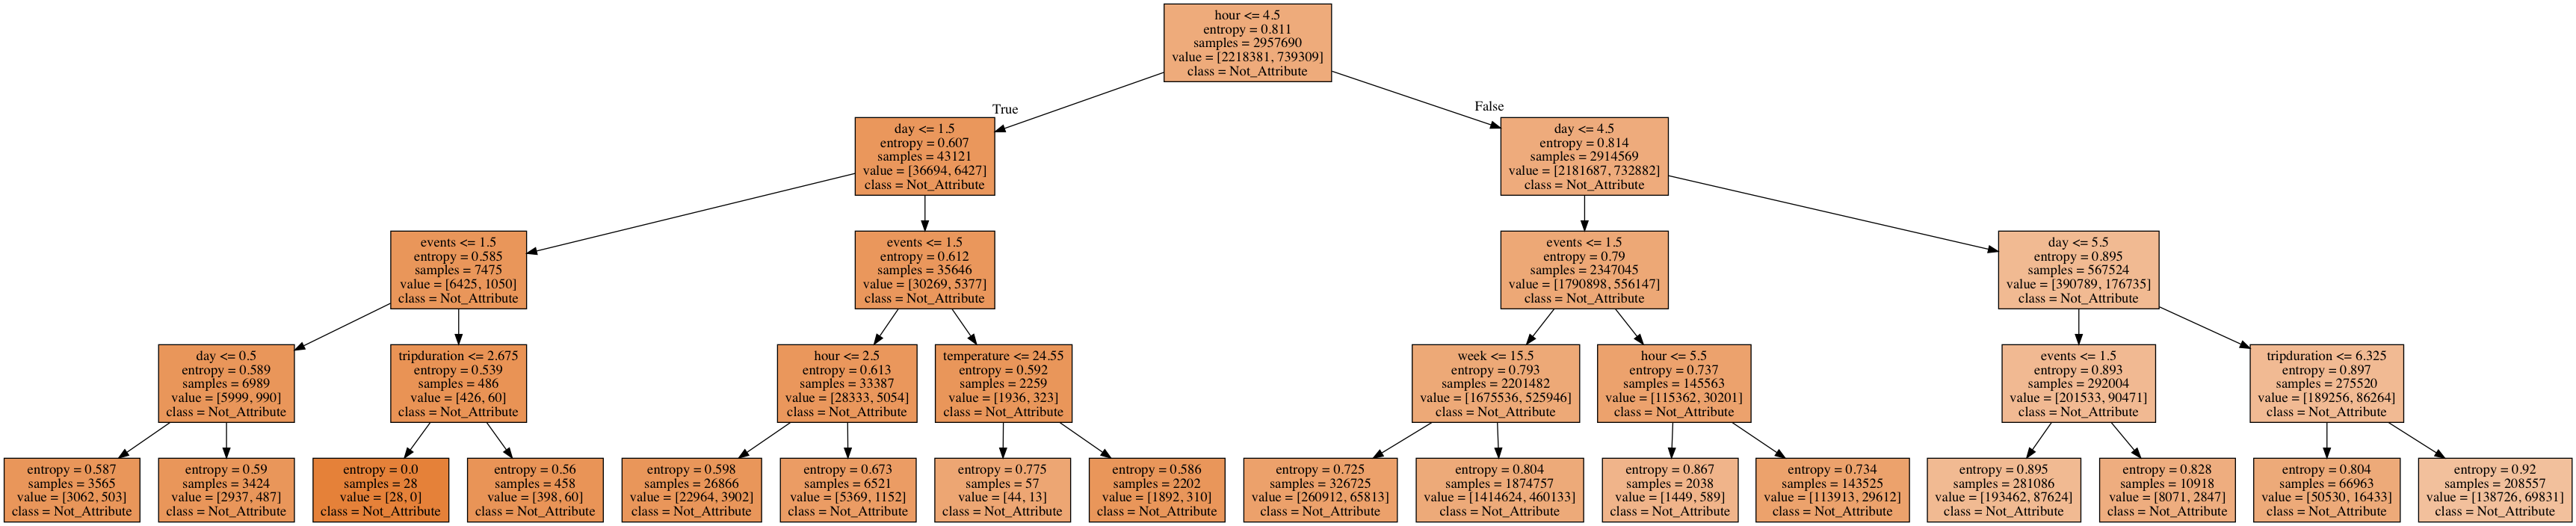

In [149]:
tree_1(1, 4, simple_data_17, simple_data_17_2.gender_Female)

The mean accuracy score for this tree is: 0.7500383745422948.
The CV score for this model is: 
 [0.75003888 0.5295653  0.54778898 0.75003804 0.75003804 0.75003804
 0.75003804 0.75003804 0.75003804 0.75004057].
Runtime: 0:00:10.229033


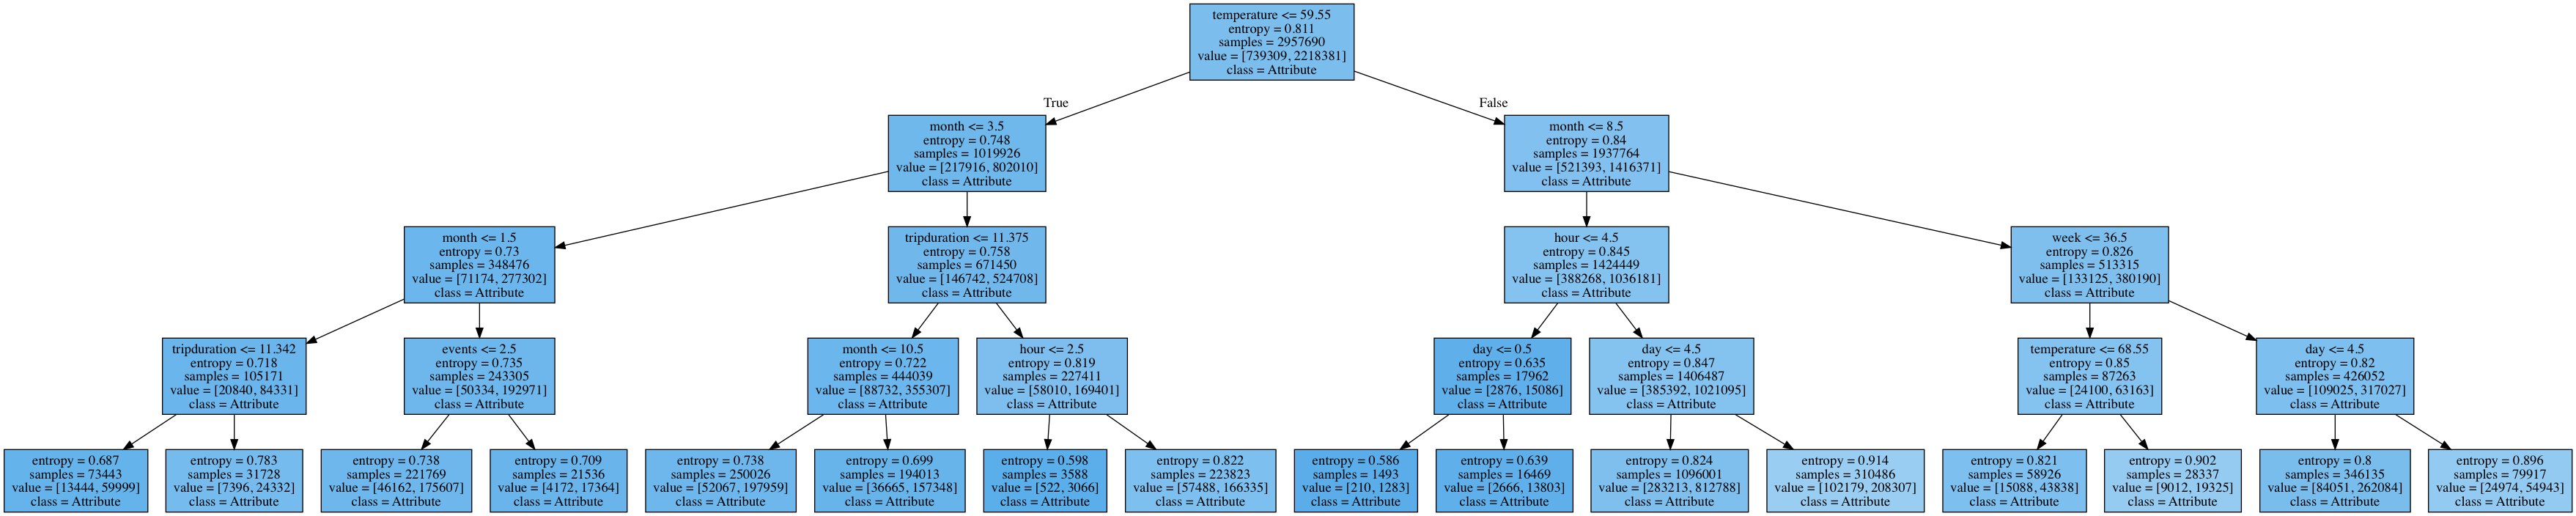

In [150]:
tree_1(1, 4, simple_data_17, simple_data_17_2.gender_Male)

> Here, you can see that the runtime of this single tree model is negligible in comparison to the random forest models.  There are a number of positives to this model, primarily that you can see how the information is split by the model at each level (and you can specify the type of information it reports back).  Here, we can see which attribute the model used to split each node, as well as the entropy/information gained as a result. It then gives you the number of samples that were evaluated and classified at each node and the numerical breakdown.  As far as the accuracy, it is relatively similar.

> That said, these models have some downfalls in comparison to random forest, namely that there is an extra step in specifying the attributes you want to use.  More importantly, the model returns only one tree and therefore its accuracy, while similar, is less reliable than the random forest model.  

The mean accuracy score for this tree is: 0.9997173469836257.
The CV score for this model is: 
 [0.999716   0.999716   0.999716   0.999716   0.99971599 0.99971599
 0.99971937 0.99971937 0.99971937 0.99971937].
Runtime: 0:00:13.058333


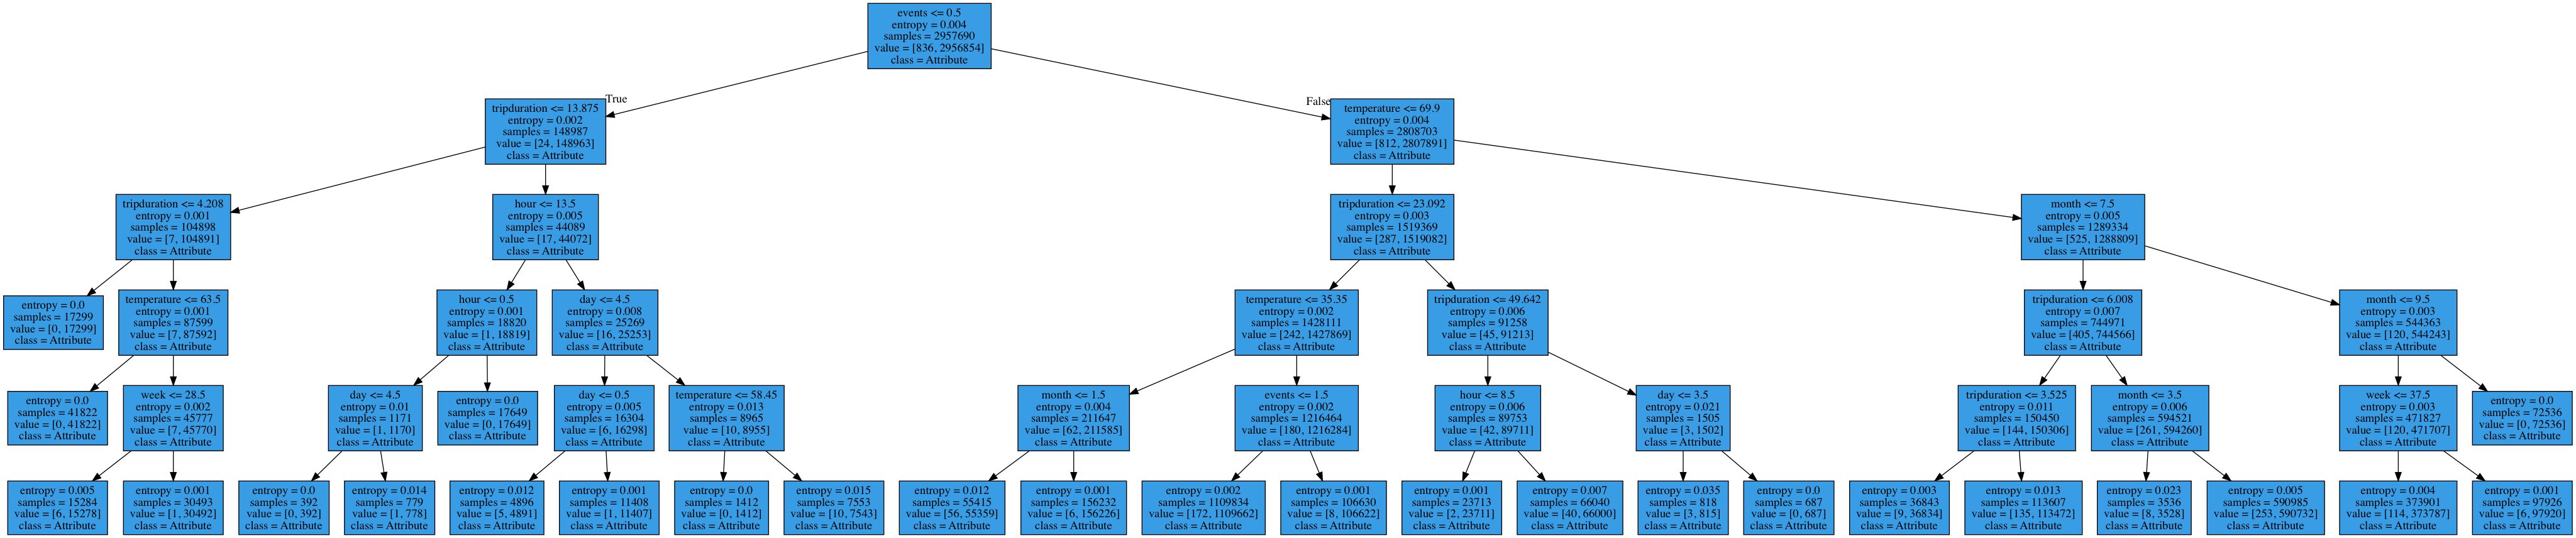

In [151]:
tree_1(1, 5, simple_data_17, simple_data_17_2.usertype_Subscriber)

The mean accuracy score for this tree is: 0.9997173469836257.
The CV score for this model is: 
 [0.999716   0.7767184  0.999716   0.999716   0.94181946 0.99971599
 0.99971937 0.99971937 0.99971937 0.99971937].
Runtime: 0:00:08.810135


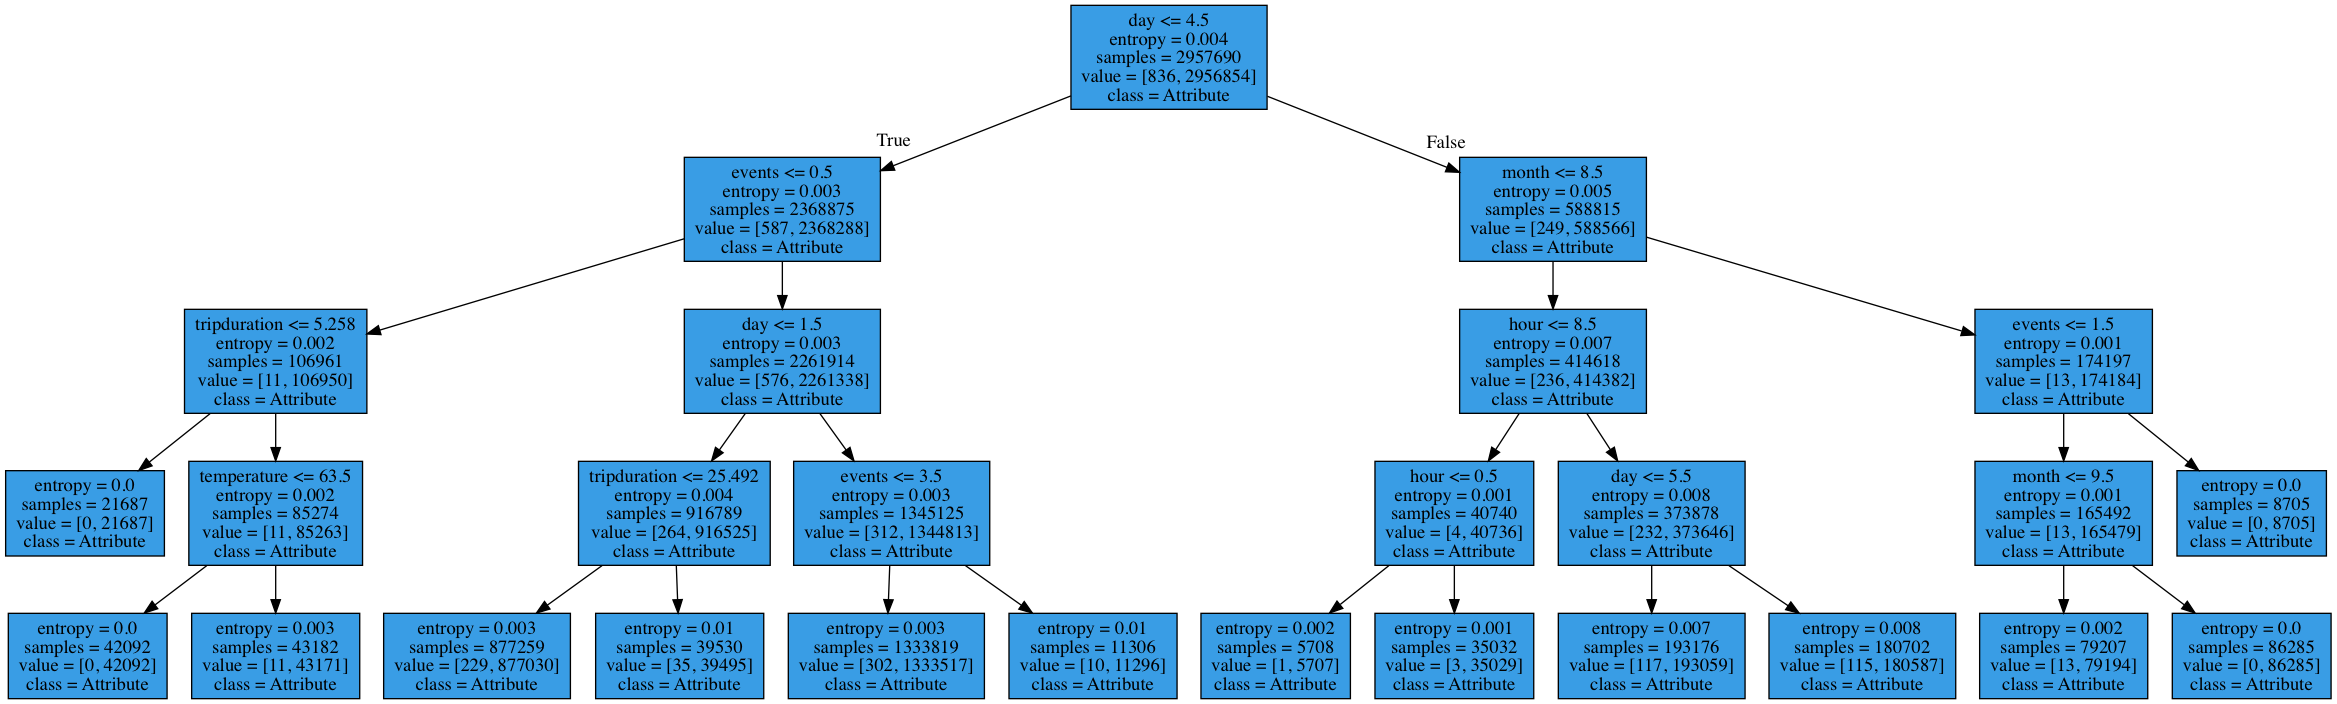

In [152]:
tree_1(1, 4, simple_data_17, simple_data_17_2.usertype_Subscriber)

> Here, we have similar constraints as the last two random forest functions and both models use the same target variable.  We get a very similar accuracy, which is good.  The second model has less levels for prediction than the one above (which leans more towards over-fitting).  

> You can see that one of the cv scores in the second model is quite lower than the others, which seems to fall in line with the face that a single decision tree is less reliable than the forest ensemble.

> The following models limit the amount of input further and test the same target variables. 

> Overall, while the decision tree is a great tool to use in exploring data and seeing any sort of underlying trends (especially when wanting to see where the data is divided and the entropy at each state), when building and implementing a model, you would want to try and use random forest.  While the runtime is signifiticantly longer, the reliability it provides outweighs an increase of runtime of a few minutes. 

In [153]:
# Using the same constraints as the second to last random forest model:

modified_df = pd.DataFrame(dumb_data_17[['month', 'events', 'tripduration']])
modified_df_2 = pd.DataFrame(dumb_data_17[['gender_Female', 'gender_Male', 'usertype_Subscriber']])

In [154]:
def tree_2(a, b, dataset, dataset1):
    
    start_time = datetime.now()
    
    d_tree = tree.DecisionTreeClassifier(
        criterion = 'entropy',
        max_features = a,
        max_depth = b)

    d_tree.fit(dataset, dataset1)
    
    dot_data = tree.export_graphviz(d_tree, 
        out_file=None, feature_names = modified_df_2.columns,
        class_names=["Not_Attribute", "Attribute"],
        filled=True)

    graph = pydotplus.graph_from_dot_data(dot_data)
    
    print("The mean accuracy score for this tree is: {}.".format(d_tree.score(X = dataset, y = dataset1)))
    print("The CV score for this model is: \n {}.".format(cross_val_score(d_tree, dataset, dataset1, cv = 10)))
    
    end_time = datetime.now()
    
    print('Runtime: {}'.format(end_time-start_time))
  
    return Image(graph.create_png())

The mean accuracy score for this tree is: 0.7500383745422948.
The CV score for this model is: 
 [0.75003888 0.49424044 0.75003804 0.75003804 0.75003804 0.75003804
 0.75003804 0.75003804 0.7266955  0.75004057].
Runtime: 0:00:20.689378


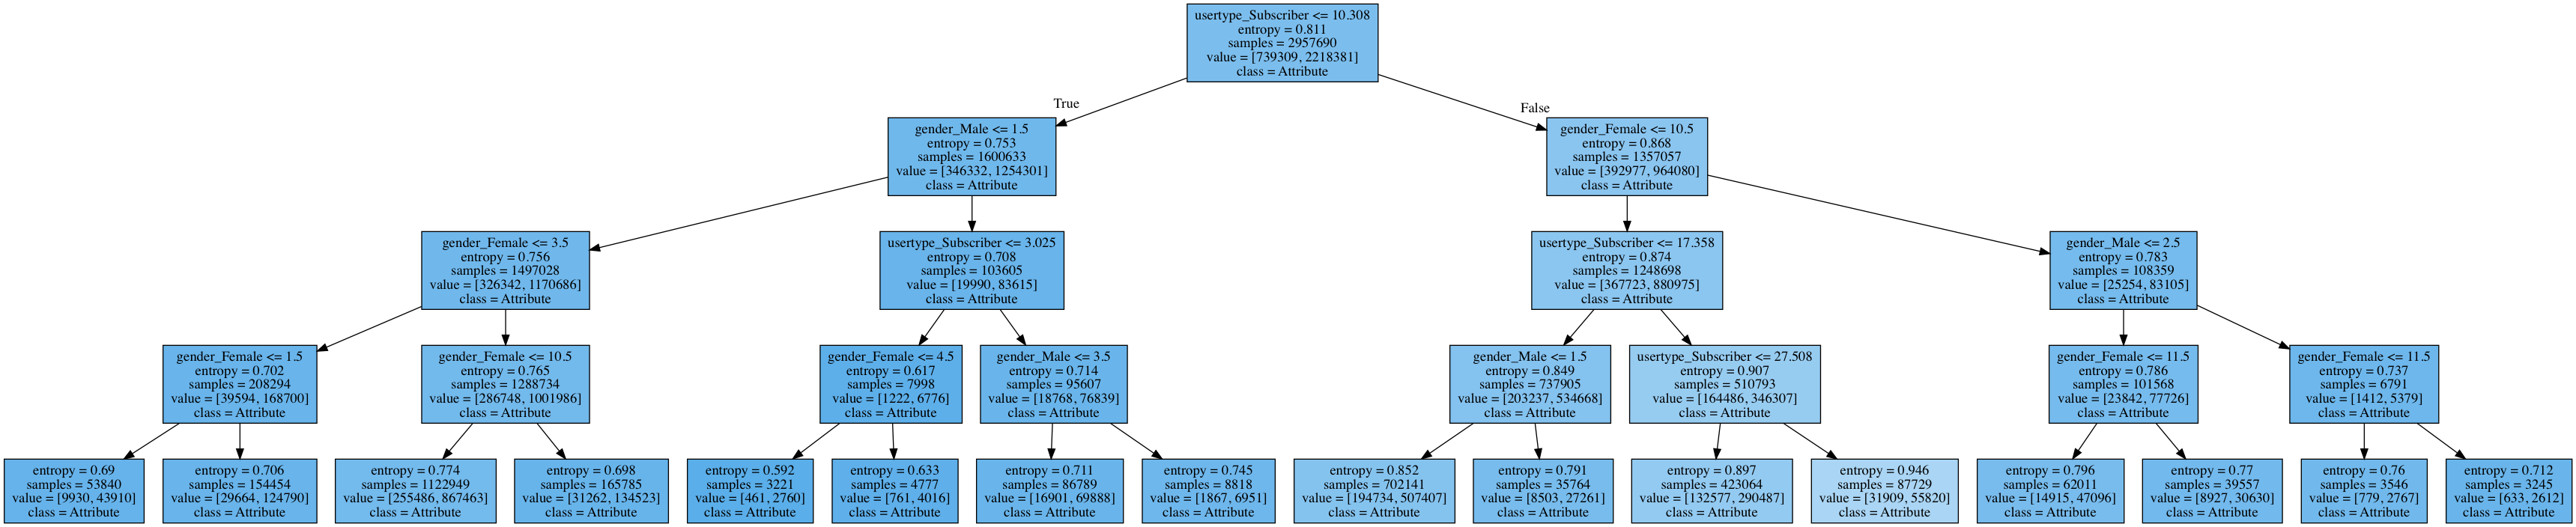

In [155]:
tree_2(1, 4, modified_df, modified_df_2.gender_Male)

The mean accuracy score for this tree is: 0.9997173469836257.
The CV score for this model is: 
 [0.999716   0.999716   0.999716   0.999716   0.99971599 0.99971599
 0.99971937 0.99971937 0.99971937 0.99971937].
Runtime: 0:00:20.683284


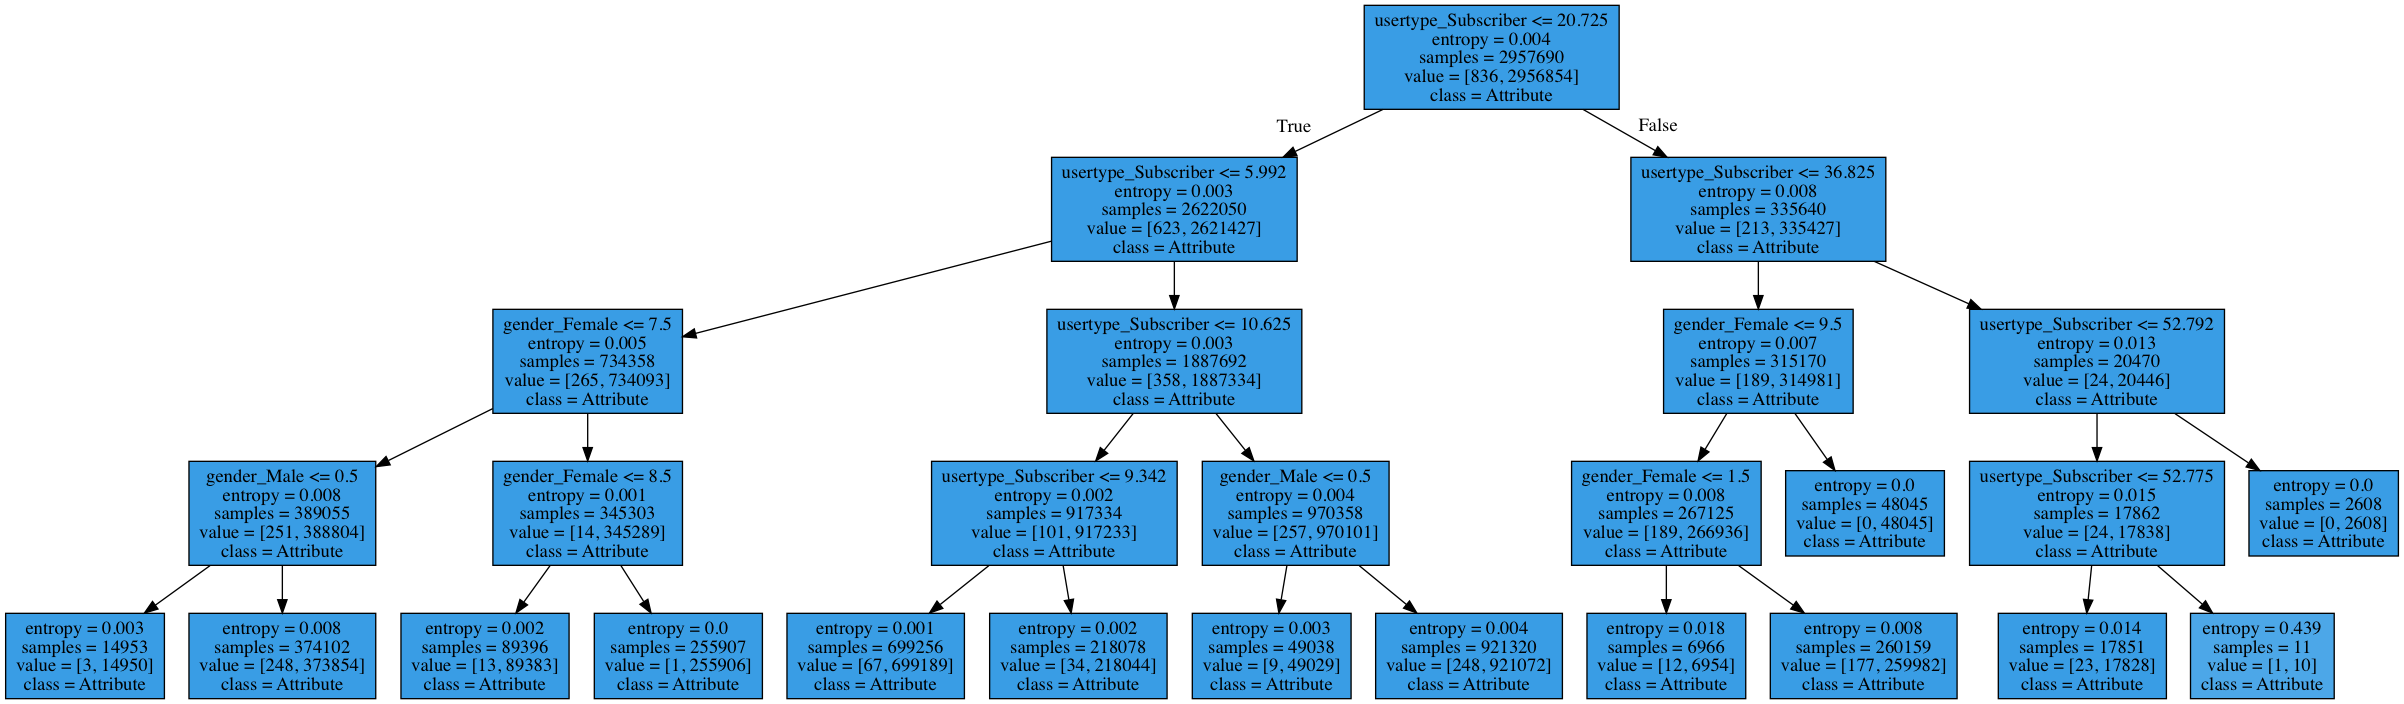

In [156]:
tree_2(1, 4, modified_df, modified_df_2.usertype_Subscriber)

###### Using one tree to run a separate prediction and poke around at it:

> Here, I wanted to use a model and test it against a separate part of the dataset that hadn't been touched yet. I used the data from 2017 to train the model, and then supplied input data from 2016 to compare it with the model. 

> I had this initially, then it changed when I tweaked the dataframes above :-/

In [246]:
# Creating the dataset to use for test-predictions:

# modified_df3 = pd.DataFrame(dumb_data_17[['month', 'events', 'tripduration']])
# modified_df3_17 = pd.DataFrame(dumb_data_17[['gender_Female']])

modified_data_16 = pd.DataFrame(dumb_data.loc[dumb_data['year'] == 2016])

simple_data_16 = pd.DataFrame(modified_data_16[['month', 'events', 'tripduration']])

simple_data_16_2 = pd.DataFrame(dumb_data_16[['gender_Female']])

In [247]:
# Making another tree to see how a gender-prediction would turn out:

d_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features = 1,
    max_depth = 4)

d_tree.fit(modified_df, modified_df_2.gender_Female)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [248]:
# Making the prediction and identifying the results:

x = d_tree.predict(simple_data_16)

unique_counts = np.unique(x, return_counts = True)
Female_Predictions_2016 = np.asarray((unique_counts)).T

Female_Actuals_2016 = simple_data_16_2.gender_Female.value_counts()

print(Female_Predictions_2016)
print(Female_Actuals_2016)

[[      0 2701353]]
0    2018964
1     682389
Name: gender_Female, dtype: int64


In [249]:
# Putting it together in a DataFrame:

comparison = pd.DataFrame(simple_data_16_2)
comparison['tree_predictions'] = x

In [250]:
# Confusion Matrix elements:

e = comparison.loc[(comparison['gender_Female'] == 0) & (comparison['tree_predictions'] == 0)]
l = comparison.loc[(comparison['gender_Female'] == 0) & (comparison['tree_predictions'] == 1)]
m = comparison.loc[(comparison['gender_Female'] == 1) & (comparison['tree_predictions'] == 0)]
o = comparison.loc[(comparison['gender_Female'] == 1) & (comparison['tree_predictions'] == 1)]

# Making a confusion Matrix:

results = [[e.gender_Female.count(), l.gender_Female.count()], [m.gender_Female.count(), o.gender_Female.count()]]

results_array = np.asarray(results).T

In [251]:
results

[[2018964, 0], [682389, 0]]